In [1]:
import numpy as np
import pandas as pd

# from atomic_forces.average_atom.python.average_atom import NeutralPseudoAtom as NPA
from atomic_forces.average_atom.python.average_atom_geometric import NeutralPseudoAtom as NPA
from atomic_forces.average_atom.python.average_atom_geometric import load_NPA
from atomic_forces.average_atom.python.misc import jacobi_relaxation, sor
from atomic_forces.average_atom.python.grids import NonUniformGrid
# from atomic_forces.average_atom.python.average_atom import load_NPA
from atomic_forces.atomOFDFT.python.physics import ThomasFermi, FermiDirac

from importlib import reload
try:
    reload(physics)
    reload(grids)
    reload(average_atom_geometric)
#     reload(average_atom)
    reload(misc)
except NameError as e:
    from atomic_forces.atomOFDFT.python import physics as physics
    from atomic_forces.average_atom.python import average_atom_geometric as average_atom_geometric
#     from atomic_forces.average_atom.python import average_atom as average_atom
    from atomic_forces.average_atom.python import misc as misc
    from atomic_forces.average_atom.python import grids as grids
    print("Error: ",e)
except Exception as e:
    print("Unexpected error during reload")
    print(e)


import matplotlib.pyplot as plt


import cProfile


eV = 0.0367512



ModuleNotFoundError: No module named 'atoMEC'
Error:  name 'physics' is not defined


In [2]:
folder= "/home/zach/plasma/atomic_forces/average_atom/data/converged/Al_NPA_TFD_R3.0e+01_rs3.0e+00_T1.0e+00eV/"
fname = "Al_NPA_TFD_R3.0e+01_rs3.0e+00_T1.0e+00eV_Zstar2.1.dat"

atom  = load_NPA(folder + fname,TFW=True, ignore_vxc=False)
# atom  = load_NPA(Al.savefile, TFW=False, ignore_vxc=False)



Intializing grid
Loading Data for Comparison (from George Petrov)
Z err: 0.00427102231121748


/home/zach/plasma/atomic_forces/GordonKim/python/atoms.py:75: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  Z_unnorm, err = quad(rho_integrand, 0, self.rs, limit=500, epsabs=1e-5, epsrel=1e-5)


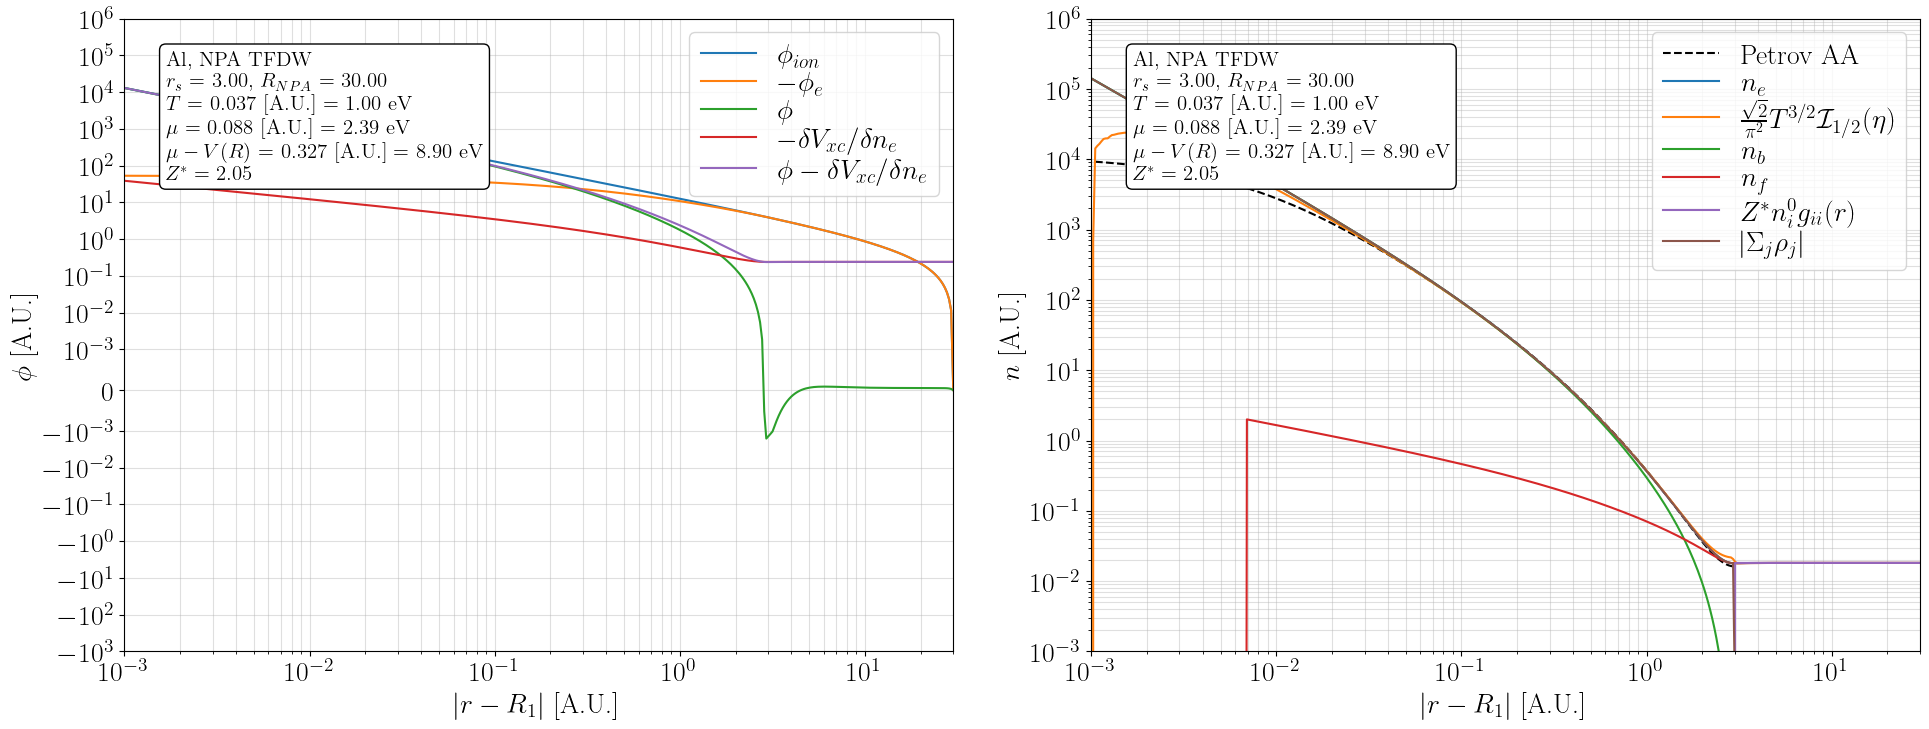

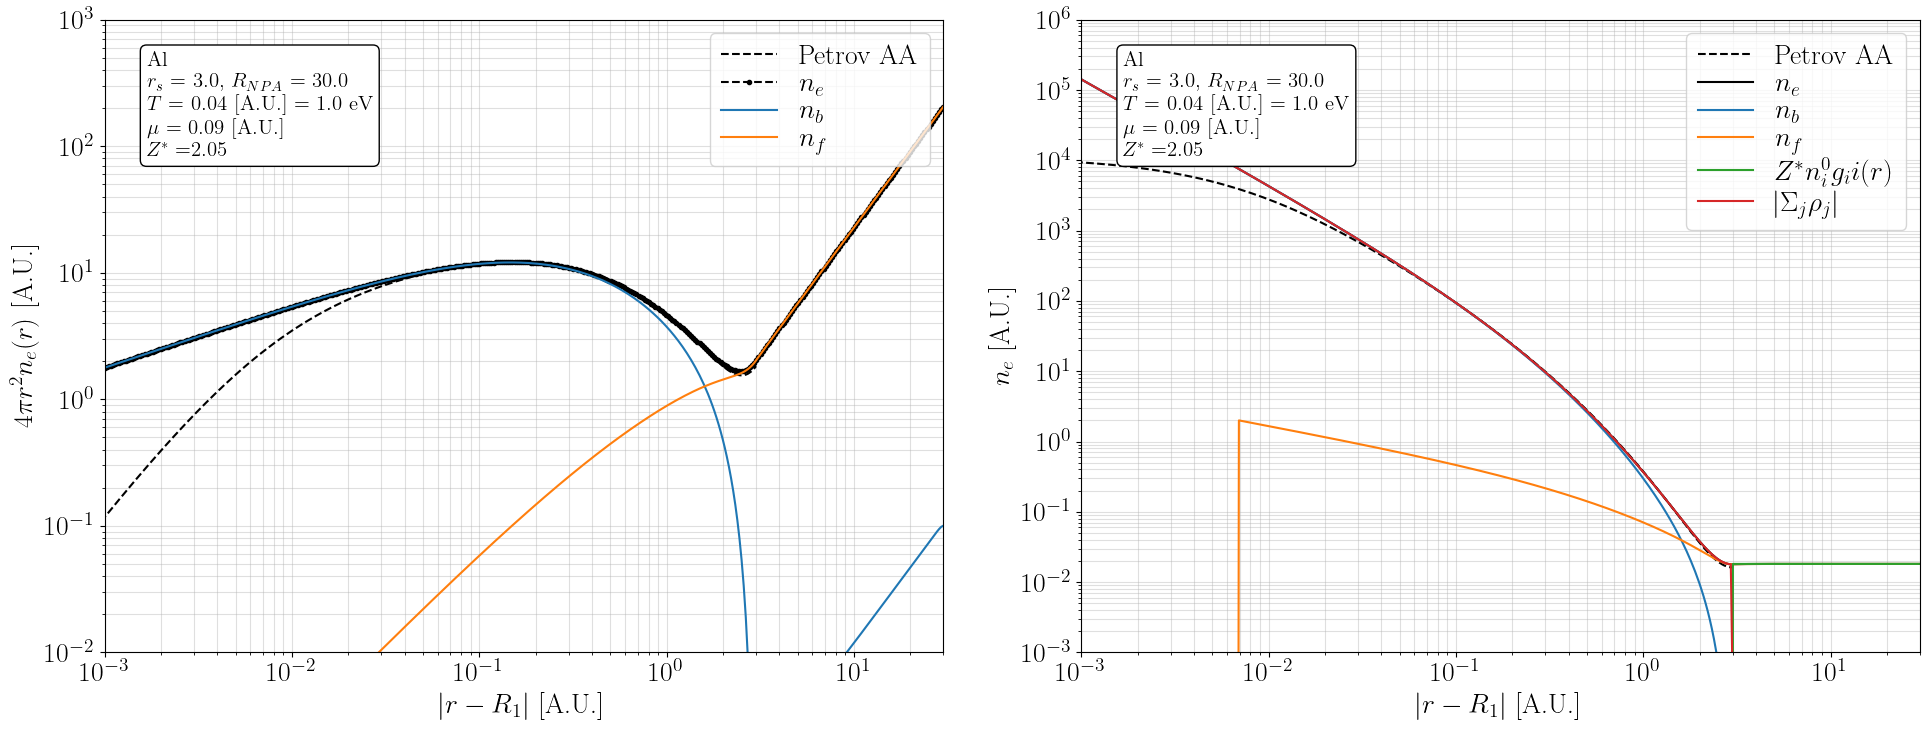

In [3]:
atom.make_plots()
atom.make_plot_bound_free()

In [4]:
cProfile.run('atom.solve_TF(nmax=1, verbose=True)')

Beginning self-consistent electron solver.
_________________________________
         210 function calls (207 primitive calls) in 0.018 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        3    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(diag)
        3    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(diagonal)
        3    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(mean)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(shape)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(sum)
        1    0.000    0.000    0.018    0.018 <string>:1(<module>)
        2    0.000    0.000    0.000    0.000 _base.py:1301(isspmatrix)
        1    0.000    0.000    0.000    0.000 _basic.py:361(solve_banded)
        3    0.000    0.000    0.000    0.000 _methods.py:163(_mean)
        2    0.000    0.000    0

NameError: name 'explicit_Ab' is not defined

## For TFDW

TypeError: get_ne_TF() missing 1 required positional argument: 'μ'

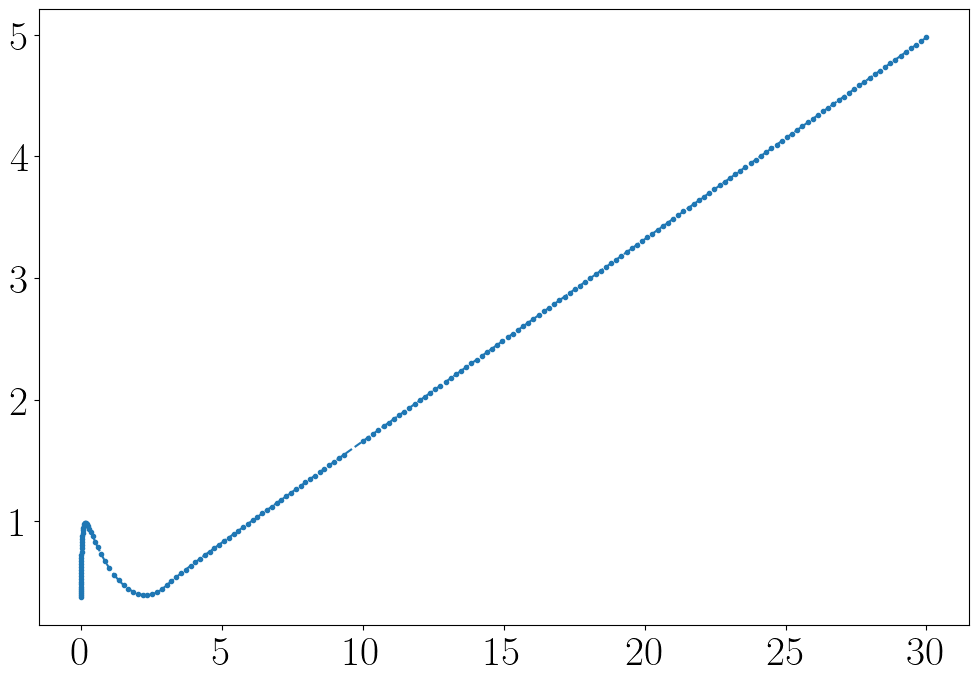

In [3]:
def plot_gamma():

    fig, ax = plt.subplots(figsize=(12,8))
    eta = atom.TF.η_interp(atom.ne)
    aW, bW = atom.get_W_coeffs(eta, atom.ne, atom.T)
    grad_n = atom.grid.dfdx(atom.ne)
    laplace_ne = 1/atom.grid.xs**2 * atom.grid.dfdx(atom.grid.xs**2 * grad_n)
    laplace_ne = 2/atom.grid.xs*atom.grid.d2fdx2(atom.ne) + atom.grid.dfdx(atom.ne)

    ax.plot(atom.grid.xs, atom.grid.xs*np.sqrt(atom.ne), '--.', label=r'$\gamma$')
    ax.plot(atom.grid.xs, atom.grid.xs*np.sqrt(atom.get_ne_TF(atom.μ)), '--.', label=r'$\gamma$ from $I_{1/2}$')
#     ax.plot(atom.grid.xs, atom.get_eta_from_sum(atom.μ) , label='eta')
#     ax.plot(atom.grid.xs, (-atom.get_W())/atom.T,'--.', label='W')
#     ax.plot(atom.grid.xs, (-aW/atom.ne**2)/atom.T, label='a')
#     ax.plot(atom.grid.xs, (-bW/atom.ne**2 * grad_n**2)/atom.T, label='Wb')
#     ax.plot(atom.grid.xs, (-aW/atom.ne * laplace_ne)/atom.T, label='Wa')
#     ax.plot(atom.grid.xs, (-atom.vxc_f(atom.ne))/atom.T, label='vxc')
#     ax.plot(atom.grid.xs, (atom.μ + atom.φe + atom.φion)/atom.T/10, label=r'$\phi$')
    
    ax.legend(fontsize=20)
#     ax.set_xlim(8.97,9)
    ax.set_yscale('symlog',linthresh=1e-2)
    ax.tick_params(labelsize=20)
#     ax.set_ylim(-1,1e2)
    plt.show()
plot_gamma()